In [1]:
import yfinance as yf


In [2]:
df=yf.download('ETH-USD')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2022-06-11,1665.217896,1679.314209,1507.038940,1529.663452,1529.663452,21127089064
2022-06-12,1530.189697,1539.705078,1436.183960,1445.216553,1445.216553,23465074882
2022-06-13,1443.835449,1448.738037,1181.948242,1204.582764,1204.582764,45162788786


In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

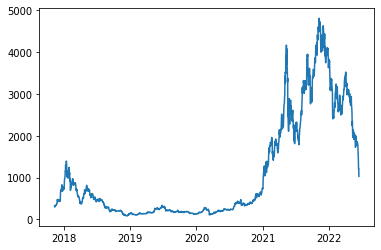

In [5]:
plt.plot(df.index, df['Adj Close'])

In [6]:
# train test split
to_row=int(len(df)*0.9)
training_data=list(df[0: to_row]['Adj Close'])
training_data

[320.8840026855469,
 299.25299072265625,
 314.6809997558594,
 307.9079895019531,
 316.71600341796875,
 337.6310119628906,
 333.35699462890625,
 330.92401123046875,
 332.3940124511719,
 347.61199951171875,
 354.385986328125,
 366.7300109863281,
 360.4010009765625,
 380.6520080566406,
 410.1659851074219,
 474.9110107421875,
 466.2760009765625,
 471.3299865722656,
 480.3550109863281,
 472.9020080566406,
 427.52301025390625,
 447.114013671875,
 466.5400085449219,
 463.4490051269531,
 465.8529968261719,
 470.2040100097656,
 463.281005859375,
 428.5880126953125,
 434.4079895019531,
 456.031005859375,
 473.50201416015625,
 441.72100830078125,
 515.135986328125,
 651.4310302734375,
 702.7670288085938,
 695.8159790039062,
 684.447998046875,
 696.208984375,
 719.9749755859375,
 794.64501953125,
 826.822998046875,
 819.0859985351562,
 821.06298828125,
 674.8599853515625,
 719.3870239257812,
 694.1480102539062,
 765.833984375,
 773.8359985351562,
 762.8419799804688,
 737.0230102539062,
 753.591979

In [7]:
testing_data=list(df[to_row:]['Adj Close'])
testing_data

[3713.85205078125,
 3682.6328125,
 3769.697021484375,
 3829.56494140625,
 3761.38037109375,
 3794.056640625,
 3550.386962890625,
 3418.408203125,
 3193.21044921875,
 3091.97265625,
 3157.75146484375,
 3083.097900390625,
 3238.111572265625,
 3372.25830078125,
 3248.28857421875,
 3310.00146484375,
 3330.53076171875,
 3350.921875,
 3212.304931640625,
 3164.025146484375,
 3095.825927734375,
 3001.1201171875,
 2557.931640625,
 2405.18115234375,
 2535.0390625,
 2440.352294921875,
 2455.93505859375,
 2468.0302734375,
 2423.001220703125,
 2547.092041015625,
 2597.084716796875,
 2603.466552734375,
 2688.27880859375,
 2792.1171875,
 2682.85400390625,
 2679.16259765625,
 2983.5869140625,
 3014.648193359375,
 3057.47607421875,
 3142.470703125,
 3122.608642578125,
 3239.45703125,
 3077.482177734375,
 2927.383544921875,
 2917.36279296875,
 2883.46337890625,
 2933.47900390625,
 3179.877197265625,
 3127.830078125,
 2881.48193359375,
 2785.7275390625,
 2763.701171875,
 2628.6484375,
 2573.816162109375,

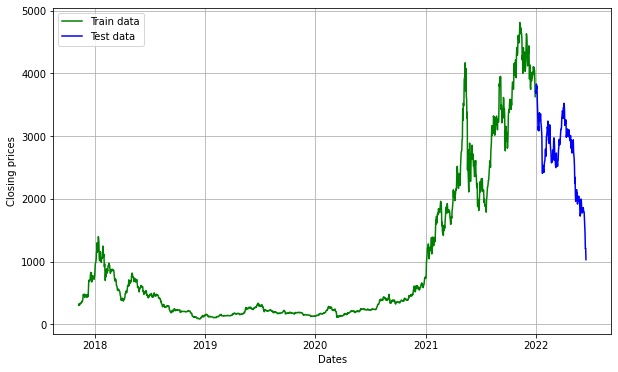

In [8]:
#spliting data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(df[0:to_row]['Adj Close'], 'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label= 'Test data')
plt.legend()

In [9]:
model_predictions=[]
n_test_obser =len(testing_data)

In [10]:
import statsmodels.api as sm

In [11]:
for i in range(n_test_obser):
    model =sm.tsa.arima.ARIMA(training_data, order =(4,1,0))
    model_fit= model.fit()
    output=model_fit.forecast()
    yhat =list(output)[0]
    model_predictions.append(yhat)
    actual_test_value=testing_data[i]
    training_data.append(actual_test_value)
   # print(output)
    #break

In [12]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1679
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -9739.683
Date:                Wed, 15 Jun 2022   AIC                          19489.365
Time:                        15:30:39   BIC                          19516.492
Sample:                             0   HQIC                         19499.414
                               - 1679                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0654      0.013     -5.073      0.000      -0.091      -0.040
ar.L2          0.0129      0.012      1.115      0.265      -0.010       0.036
ar.L3          0.0313      0.012      2.503      0.0

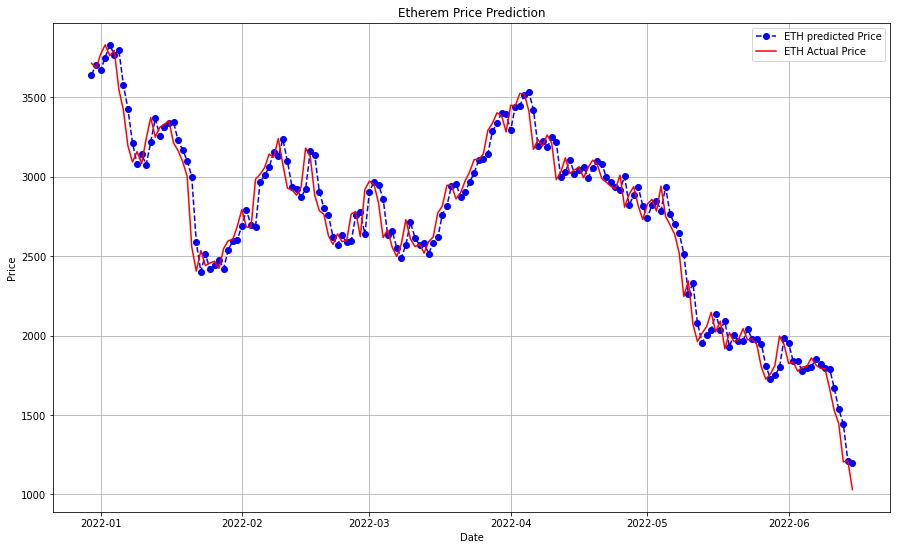

In [13]:
plt.figure(figsize=(15,9))
plt.grid(True)
date_range=df[to_row:].index
plt.plot(date_range, model_predictions,color='blue', marker='o', linestyle='dashed', label='ETH predicted Price')
plt.plot(date_range, testing_data, color='red', label='ETH Actual Price')
plt.title('Etherem Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
mape=np.mean(np.abs(np.array(model_predictions) -np.array(testing_data))/np.abs(testing_data))

In [15]:
print('MAPE: '+str(mape))

MAPE: 0.03496552230576239


In [16]:
# the above mape is used for report performance
#Mape means mean Absolute percentage error
# Around 3.0% MAPE implies the model is about 97% accurate in predicting the test set observations.